# Inaugural Project

In this project, we will analyze a simple household specialization model, containing a male and female member. They jointly get utility from consumption of market goods and home production, while having disutility from working - both in house and in the market. We will analyze how this model is solved numerically with respect to parameter changes and combinations, and finally comparing our model with data from Siminski and Yetsenga (2022).

Imports and set magics:

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2


# Importing HouseholdSpecializationModelClass
from HouseholdSpecializationModel import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

In question 1, we simply illustrate the ratio between hours worked in the house of the female relative to the male, for different combinations of sigma and alpha:

       0.5   1.0   1.5
0.25  0.545 0.308 0.214
0.50  1.000 1.000 1.000
0.75  1.833 3.250 4.667


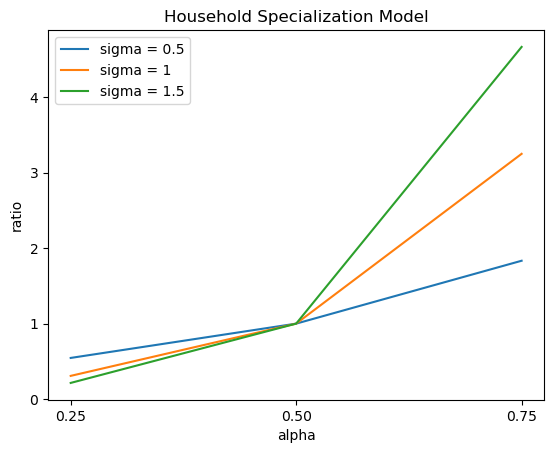

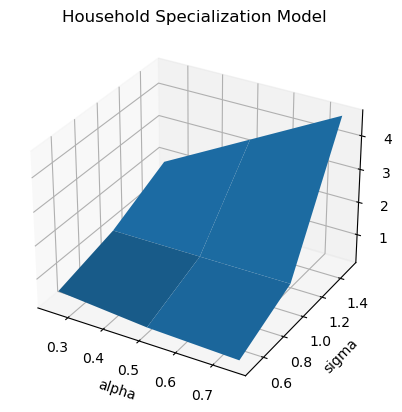

Alpha reset to: 0.5 , Sigma reset to 1


In [109]:
#Initialize a household class:
hm = HouseholdSpecializationModelClass()

#Creates vectors for the three cases for each variable:
alpha_vec=[0.25, 0.5, 0.75]
sigma_vec= [0.5, 1, 1.5]
data = get_data(alpha_vec, sigma_vec,hm)

#Matrix/Array manipulation
alpha_grid, sigma_grid = np.meshgrid(alpha_vec, sigma_vec)
ratio_grid = np.array(data)


#Prints a simple table of the ratios 
print_table(alpha_vec,sigma_vec,hm)


#Prints graphs
plotQ1figure_1(data, alpha_vec, sigma_vec)
plotQ1Figure_2(alpha_grid, sigma_grid, ratio_grid,alpha_vec, sigma_vec)

#Resets alpha and sigma values
hm.par.alpha=0.5
hm.par.sigma=1
print(f"Alpha reset to: {hm.par.alpha}", f", Sigma reset to {hm.par.sigma}")


From the ilustration we can se that the ratio is unaffected by sigma when alpha is one half, The ratio also becomes bigger as alpha becomes bigger. For large values of sigma the ratio is more affected by the value of alpha and for small values of sigma the ratio is less affected by the value of alpha.

# Question 2

In Q2 we seek to examine the relationsship between log ratio of hours worked for male and female and the log ratio of wage of female and males:

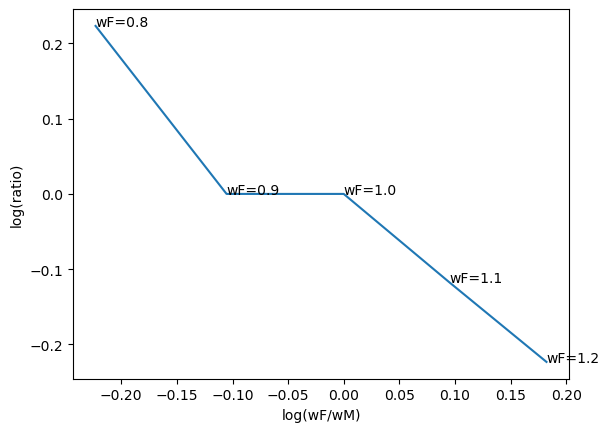

In [110]:
#resets parameters
hm.par.alpha=0.5
hm.par.sigma=1
hm.par.wF=1

#Creates the vector for the needed wagevalues
wF_vector = [0.8, 0.9, 1.0, 1.1, 1.2]
plotQ2Figure_1(wF_vector, hm)



From the plot we observe that the log ratio fals as the log wage ratio rises, the interpretation of this is that the female household contribution falls compared to male household contribution when the female wage rises compared the the male wage, this makes sens as higher wage creates an incentive to work insted of putting in the work hours at home, as the oppetunity cost of not woking rises. it should be noted that the ratio dose not change when the wage ratio is between 0.9 and 1. 

# Question 3

We now examine the ratios as in question 2, but with a continous solver. This should produce a function without the kinks of what was seen in Q2.

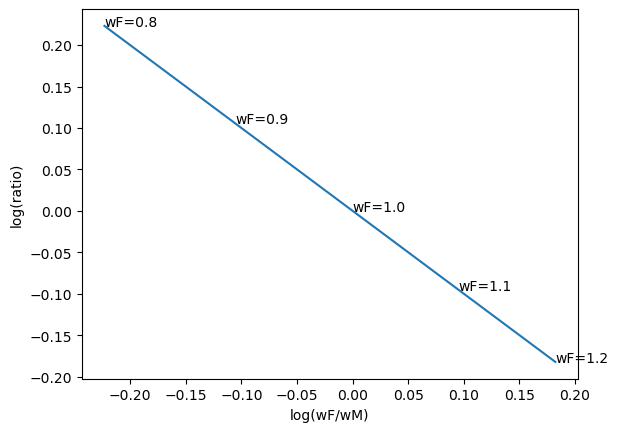

In [111]:
#resets parameters
hm.par.alpha=0.5
hm.par.sigma=1
hm.par.wF=1


#Creates the vector for the needed wagevalues
wF_vector = [0.8, 0.9, 1.0, 1.1, 1.2]
plotQ3Figure_1(wF_vector, hm)


The work hours are now continuos instead of discrete, but otherwise it is the same as question 2. The change from discrete to continuos means that the graf becomes linear and the ratio being strictly negativly affected by the wage ratio where the itution behind it is the same as for Q2.  

# Question 4 

We now estimate the model parameters that give the lowest error cf. Siminski and Yetsenga (2022). That is, we estimate the alpha and sigma value that yields a beta_0 value (constant) of 0.4 and a beta_1 value (coefficient for log wage ratio) of -0.1 in the equation for log ratio of house work between female and male part in the household.

Optimal alpha: 0.9819855180239534
Optimal sigma: 0.10003901171748744


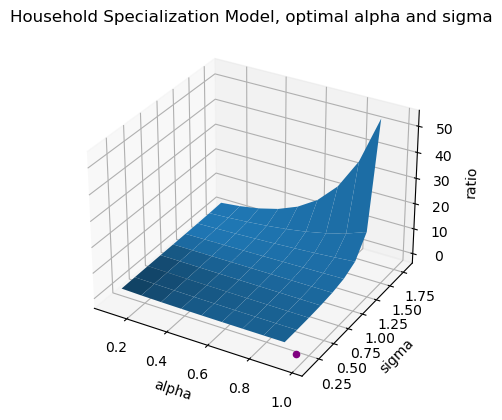

In [112]:
#resets parameters
hm.par.alpha=0.5
hm.par.sigma=1
hm.par.wF=1
#estimate the best model cf. Siminski and Yetsenga (2022)
hm.estimate()
alphaoptimum = hm.par.alpha
sigmaoptimum = hm.par.sigma

# Plot the optimums in a plot with a somewhat less kinky version of the 3D plot in Q1:
plotQ4Figure_1(alphaoptimum,sigmaoptimum)

We can see that in order for the data to fit the model, it would mean that women should be 0.98 productive in the household for the difference in hours put compared to wage ratio fit the model. This seems highly unlikely, and the model therefore does not seem to fit reality very well

# Question 5

In this question we seek to minimize the error cf Siminisky and Yetsinga (2022), holding alpha constant at 0.5. To change the model to fit the data better and have alpha=0.5, we changed the disutility function such that men and women have different disutility factors for working at home. We then minimized the error-function given in question 4 wrt. nu_M (the disutility factor for men) and sigma, to find what this parameter should be for the model to fit.

In [113]:
hm = HouseholdSpecializationModelClass()
#resets parameters
hm.par.alpha=0.5
hm.par.sigma=1
hm.par.wF=1

hm.estimate_opg5()

Optimal nu_M: 0.0014840896606445348
Optimal sigma: 0.1003753662109367


 We find that men's disutility should be 0.0015, while women's are 0.001. The error is therefore minimized when men's disutility from working at home is higher than women's